## Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

####  1 Logistic Regression


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap

2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

####  2 Linear SVM

1. Performing the same steps (2, 3, 4, 5) we have done in the above.


## Logistic Regression

### 1. Correlation between features

<Axes: >

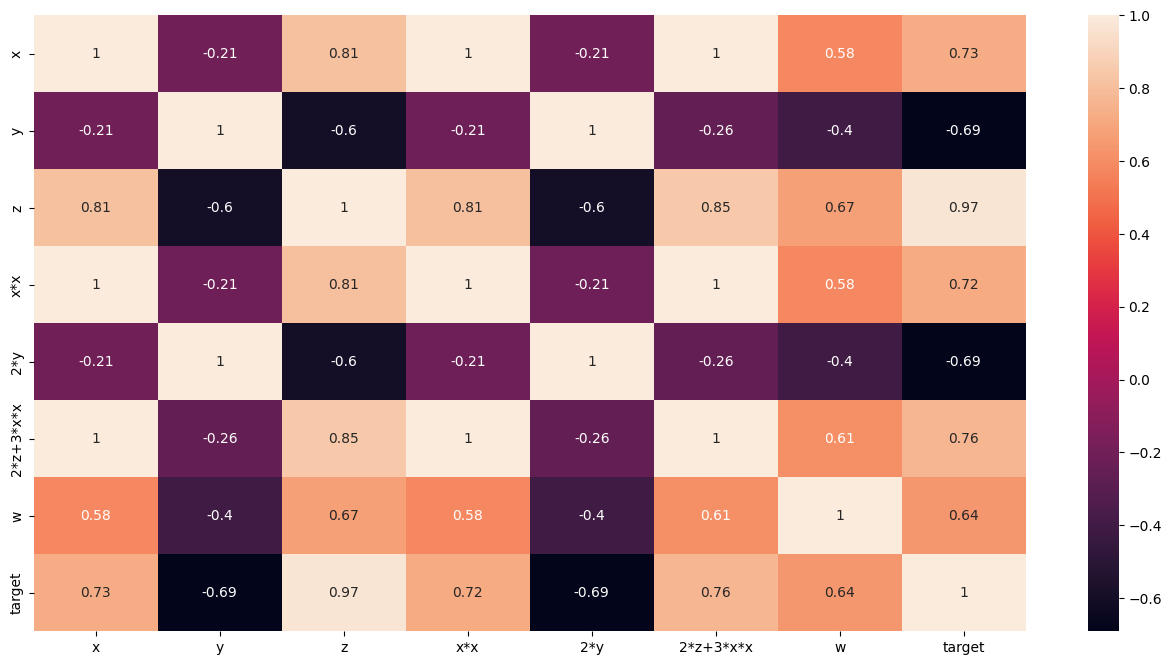

In [5]:
fig, ax = plt.subplots(figsize=(16,8)) 
sns.heatmap(data.corr(), annot=True, ax=ax)

Best cross-validation score: 1.00
Best parameters:  {'C': 0.0001}


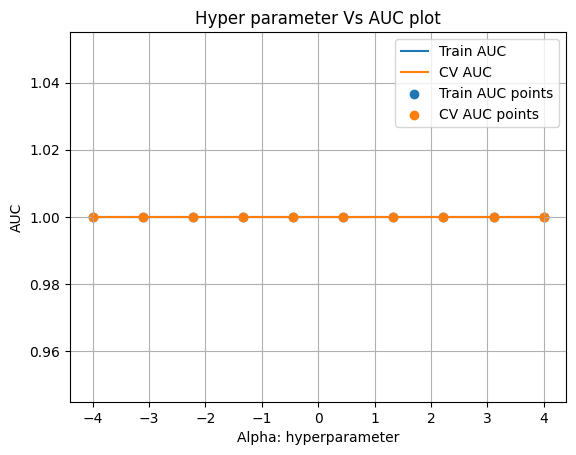

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009795,0.021442,0.050922,0.146452,0.0001,{'C': 0.0001},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.001997,0.000627,0.001398,0.000481,0.000774,{'C': 0.000774263682681127},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.001792,0.000393,0.001309,0.000453,0.005995,{'C': 0.005994842503189409},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.001801,0.000400,0.001300,0.000459,0.046416,{'C': 0.046415888336127774},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.002104,0.000299,0.001404,0.000488,0.359381,{'C': 0.3593813663804626},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

params = {'C' : np.logspace(-4, 4, 10)}
lr = LogisticRegression()

clf = GridSearchCV(lr, params, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)
#print(clf.cv_results_)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
#A =  results['param_alpha']
log_alpha = []
for alpha in results['param_C']:
    log_alpha.append(mt.log10(alpha))

plt.plot(log_alpha, train_auc, label='Train AUC')
# Ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# Ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [7]:
best_model = LogisticRegression(C=0.0001)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.0001)

In [8]:
best_model_accuracy = best_model.score(X_test, y_test)
best_model_accuracy

1.0

In [9]:
W = best_model.coef_
W

array([[ 0.00260813, -0.00253236,  0.00331415,  0.00257379, -0.00253236,
         0.00271656,  0.00209882]])

In [10]:
noise = np.random.normal(0, 0.01, [100, 7])
#noise

In [11]:
X_ = X + noise

In [12]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, Y, test_size=0.3, stratify=Y, random_state=42)

best_model.fit(X_train_, y_train_)

LogisticRegression(C=0.0001)

In [13]:
best_model_accuracy_edited = best_model.score(X_test_, y_test_)
best_model_accuracy_edited

1.0

In [14]:
W_ = best_model.coef_
W_

array([[ 0.00260849, -0.00253331,  0.00330992,  0.00257099, -0.0025343 ,
         0.00272004,  0.00209615]])

In [15]:
accuracy_change = best_model_accuracy - best_model_accuracy_edited
accuracy_change

0.0

In [16]:
coef_change = np.absolute(W - W_)
coef_change

array([[3.63985336e-07, 9.52531116e-07, 4.23384893e-06, 2.80487179e-06,
        1.94741814e-06, 3.47653191e-06, 2.66899060e-06]])

In [28]:
def get_top_4_features_lr(coef_change):
    return data.columns[np.argsort(coef_change)[0]][:-5:-1].tolist()

In [29]:
get_top_4_features_lr(coef_change)

['z', '2*z+3*x*x', 'x*x', 'w']

In [30]:
data.columns

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')

## Linear SVM

In [31]:
X.shape, Y.shape

((100, 7), (100,))

Best cross-validation score: 1.00
Best parameters:  {'C': 0.0001}


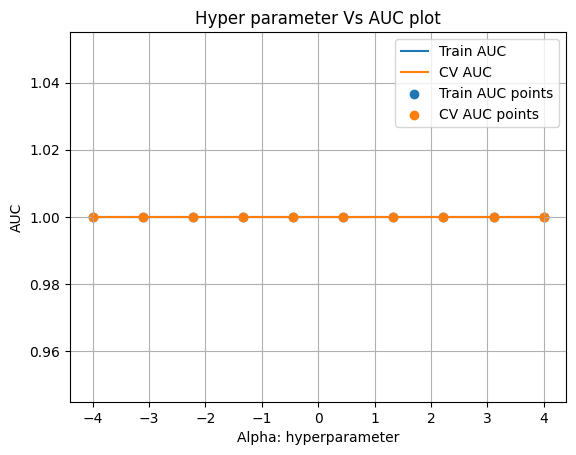

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011790,0.033362,0.001903,0.000959,0.0001,{'C': 0.0001},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.001004,0.000447,0.001692,0.000645,0.000774,{'C': 0.000774263682681127},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.000697,0.000456,0.001495,0.000501,0.005995,{'C': 0.005994842503189409},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.000493,0.000493,0.001304,0.000457,0.046416,{'C': 0.046415888336127774},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.000688,0.000451,0.001699,0.000442,0.359381,{'C': 0.3593813663804626},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

params = {'C' : np.logspace(-4, 4, 10)}
lsvm = LinearSVC()

clf = GridSearchCV(lsvm, params, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)
#print(clf.cv_results_)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
#A =  results['param_alpha']
log_alpha = []
for alpha in results['param_C']:
    log_alpha.append(mt.log10(alpha))

plt.plot(log_alpha, train_auc, label='Train AUC')
# Ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# Ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [33]:
best_model = LinearSVC(C=0.0001)
best_model.fit(X_train, y_train)

LinearSVC(C=0.0001)

In [34]:
best_model_accuracy = best_model.score(X_test, y_test)
best_model_accuracy

1.0

In [35]:
W = best_model.coef_
W

array([[ 0.00983157, -0.0096314 ,  0.01259645,  0.00969319, -0.0096314 ,
         0.01024476,  0.00788752]])

In [36]:
noise = np.random.normal(0, 0.01, [100, 7])
#noise

In [37]:
X_ = X + noise

In [38]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, Y, test_size=0.3, stratify=Y, random_state=42)

best_model.fit(X_train_, y_train_)

LinearSVC(C=0.0001)

In [39]:
best_model_accuracy_edited = best_model.score(X_test_, y_test_)
best_model_accuracy_edited

1.0

In [40]:
W_ = best_model.coef_
W_

array([[ 0.00982487, -0.00962908,  0.01258257,  0.00969276, -0.00963606,
         0.01026046,  0.00791234]])

In [41]:
accuracy_change = best_model_accuracy - best_model_accuracy_edited
accuracy_change

0.0

In [42]:
coef_change = np.absolute(W - W_)
coef_change

array([[6.70225770e-06, 2.31660681e-06, 1.38847364e-05, 4.32303671e-07,
        4.66414594e-06, 1.56978357e-05, 2.48264505e-05]])

In [43]:
def get_top_4_features_svm(coef_change):
    return data.columns[np.argsort(coef_change)[0]][:-5:-1].tolist()

In [44]:
get_top_4_features_svm(coef_change)

['w', '2*z+3*x*x', 'z', 'x']

In [45]:
data.columns

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')

## Observation
1. There is no impact on accuracy of either model but there is difference in weights of Both model after adding noise into data.